In [3]:
# analysis for the CDNOW data using python
import numpy as np
import pandas as pd

In [4]:
# import the data
data=pd.read_csv('CDNOW.txt', names=['user_id', 'order_date', 'order_products','order_amount'],sep = '\s+')

In [5]:
# get the first look at the data
data.head()

,user_id,order_date,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [6]:
data.tail()

,user_id,order_date,order_products,order_amount
69654,23568,19970405,4,83.74
69655,23568,19970422,1,14.99
69656,23569,19970325,2,25.74
69657,23570,19970325,3,51.12
69658,23570,19970326,2,42.96


In [7]:
# statistical summary
data.describe()

,user_id,order_date,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [35]:
# impute missing data
data.count() # no missing data

user_id           69659
order_date        69659
order_products    69659
order_amount      69659
month             69659
dtype: int64

In [8]:
# convert the date
data['order_date'] = pd.to_datetime(data.order_date, format = '%Y%m%d')
data

,user_id,order_date,order_products,order_amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


In [9]:
data['month'] = data.order_date.astype('datetime64[M]')

In [10]:
# sort the order data by id
user_group=data.groupby('user_id').sum()

In [11]:
user_group.head()

,order_products,order_amount
user_id,,
1,1,11.77
2,6,89.00
3,16,156.46
4,7,100.50
5,29,385.61


In [12]:
user_group.describe() 
# Each customer bought 7 products and spent 106 on average. 
# Overally, most customers had fair purchasing power and it follows normal distribution. 
# The highest amount is 13991 while the lowest is 0. 
# The median amount is 43.4, much lower than the mean value. So the data is right skewed normal distribution.

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


In [13]:
# Then check the histogram plots
import seaborn as sns

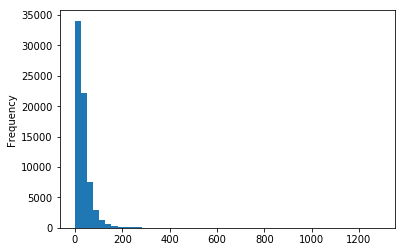

In [14]:
data['order_amount'].plot.hist(bins=50) # order_amount

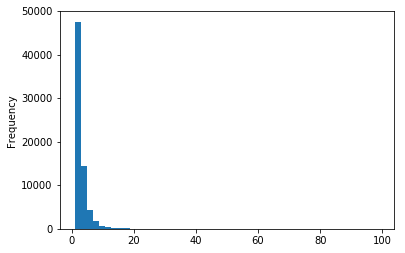

In [15]:
data['order_products'].plot.hist(bins=50) # order_product

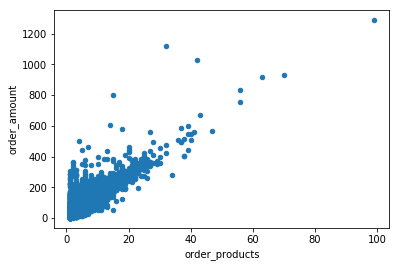

In [17]:
# scatter plot
data.plot.scatter(x = 'order_products', y = 'order_amount') 
# a large number of customers ordered less than 40 products and spent 600

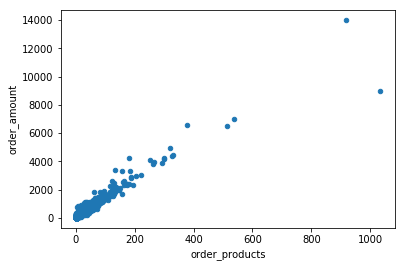

In [18]:
# the scatter plot group by user_id  
user_group.plot.scatter(x = 'order_products', y = 'order_amount')
# for thses two variables, we can consider to fit a regression model 

In [29]:
import matplotlib.pyplot as plt

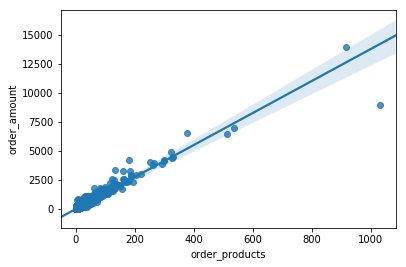

In [33]:
sns.regplot('order_products', 'order_amount', data=user_group) # there are some outliers away from CI

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression(fit_intercept=True)

In [38]:
X=user_group['order_products']

In [39]:
y=user_group['order_amount']

In [44]:
X = X[:, np.newaxis]
print(X.shape)
print(y.shape)

(23570, 1)
(23570,)


In [45]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# the estimate of fitted model
print("Model slope: ", model.coef_[0])
print("Model intercept: ", model.intercept_)

Model slope:  13.798074296551256
Model intercept:  7.801489988149285


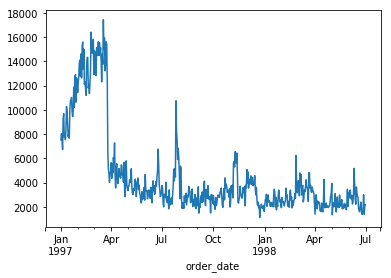

In [47]:
# time series plots
data.groupby('order_date').order_amount.sum().plot() 
# order_amount initially increased from 6000 in Jan.1997 then decreased sharply to 25% in Apr.1997. 
# And till Jul.1998, the order amount was around 2000.

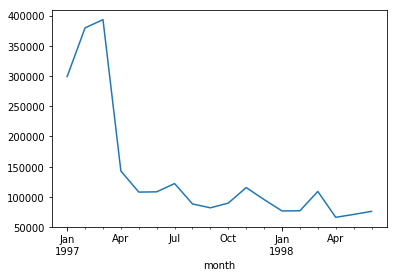

In [48]:
data.groupby('month').order_amount.sum().plot() # kernel smooth plot

In [49]:
# the first time customer purchased
data.groupby('user_id').month.min().value_counts() # most purchased within the first three months 

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [50]:
# there are 5 months that more than 1000 customers ordered
data.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [51]:
data.groupby('user_id').order_date.max().value_counts()

1997-02-08    221
1997-03-12    213
1997-02-04    210
1997-03-06    204
1997-02-27    202
1997-02-10    202
1997-03-04    201
1997-02-03    196
1997-02-25    195
1997-02-01    192
1997-02-06    191
1997-02-24    188
1997-03-05    188
1997-03-18    188
1997-02-26    187
1997-03-10    185
1997-03-01    183
1997-02-18    181
1997-03-03    178
1997-03-16    178
1997-02-07    177
1997-02-09    176
1997-03-17    175
1997-03-24    173
1997-01-27    173
1997-03-23    173
1997-02-28    172
1997-02-15    172
1997-01-19    172
1997-03-09    171
             ... 
1997-10-18      9
1997-07-02      8
1997-10-05      8
1997-08-29      8
1997-07-03      8
1997-07-05      8
1997-08-11      8
1997-09-30      8
1997-07-17      8
1997-09-08      8
1997-12-31      7
1997-06-14      7
1997-07-15      7
1997-08-06      7
1997-09-04      7
1997-10-02      7
1997-06-13      6
1997-07-16      6
1997-08-09      6
1997-08-05      6
1997-09-03      6
1997-07-11      5
1997-09-26      5
1997-08-08      5
1997-06-05

In [56]:
# the count data by user_id
df=data.groupby('user_id').count()

In [57]:
df.describe() # The most loyal customers ordered in 217 dates and the mean number of order_date is 3.

,order_date,order_products,order_amount,month
count,23570.000000,23570.000000,23570.000000,23570.000000
mean,2.955409,2.955409,2.955409,2.955409
std,4.736558,4.736558,4.736558,4.736558
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000
max,217.000000,217.000000,217.000000,217.000000


In [58]:
df[df["order_date"]==1].sum() # 11908 customers that only had purchase in certain day

order_date        11908
order_products    11908
order_amount      11908
month             11908
dtype: int64